## Data Information


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [40]:
path = 'data/train.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [41]:
df.describe(include='all')

PassengerId HomePlanet CryoSleep    Cabin  Destination          Age   
count         8693       8492      8476     8494         8511  8514.000000  \
unique        8693          3         2     6560            3          NaN   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4602      5439        8         5915          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.827930   
std            NaN        NaN       NaN      NaN          NaN    14.489021   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall           Spa   
count    8490   8512.000000   8510.000000   8485.000000   8510.000000  \
unique      2           NaN           NaN           NaN           NaN   
top     False           NaN           NaN           NaN           NaN   
freq     8291           NaN           NaN           NaN           NaN   
mean      NaN    224.687617    458.077203    173.729169    311.138778   
std       NaN    666.717663   1611.489240    604.696458   1136.705535   
min       NaN      0.000000      0.000000      0.000000      0.000000   
25%       NaN      0.000000      0.000000      0.000000      0.000000   
50%       NaN      0.000000      0.000000      0.000000      0.000000   
75%       NaN     47.000000     76.000000     27.000000     59.000000   
max       NaN  14327.000000  29813.000000  23492.000000  22408.000000   

              VRDeck            Name Transported  
count    8505.000000            8493        8693  
unique           NaN            8473           2  
top              NaN  Gollux Reedall        True  
freq             NaN               2        4378  
mean      304.854791             NaN         NaN  
std      1145.717189             NaN         NaN  
min         0.000000             NaN         NaN  
25%         0.000000             NaN         NaN  
50%         0.000000             NaN         NaN  
75%        46.000000             NaN         NaN  
max     24133.000000             NaN         NaN

## Delete Useless Feature

In [42]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

## Categorize the data type

In [43]:
categorical_list = df.select_dtypes(['object']).columns
numerical_list = df._get_numeric_data().columns

print("The list of categorical data: " + categorical_list.tolist().__str__())
print("The list of numerical data: " + numerical_list.tolist().__str__())

The list of categorical data: ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
The list of numerical data: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


# Data Process
## 1. Fill the null-value:

- Filling the missing data with the mean or median value if it’s a numerical variable.
- Filling the missing data with mode if it’s a categorical value.

In [44]:
for col in categorical_list:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in numerical_list:
    df[col].fillna(df[col].median(), inplace=True)

# check for correctness: (optional)
# for col in categorical_list:
#     print(col + ": ", df[col].isnull().sum())
#
# for col in numerical_list:
#     print(col + ": ", df[col].isnull().sum())

## 2. Analyze Categorical Data:

- if the count of the column is less than certain number, say 5: use it as normal
- otherwise, convert it to a numerical data

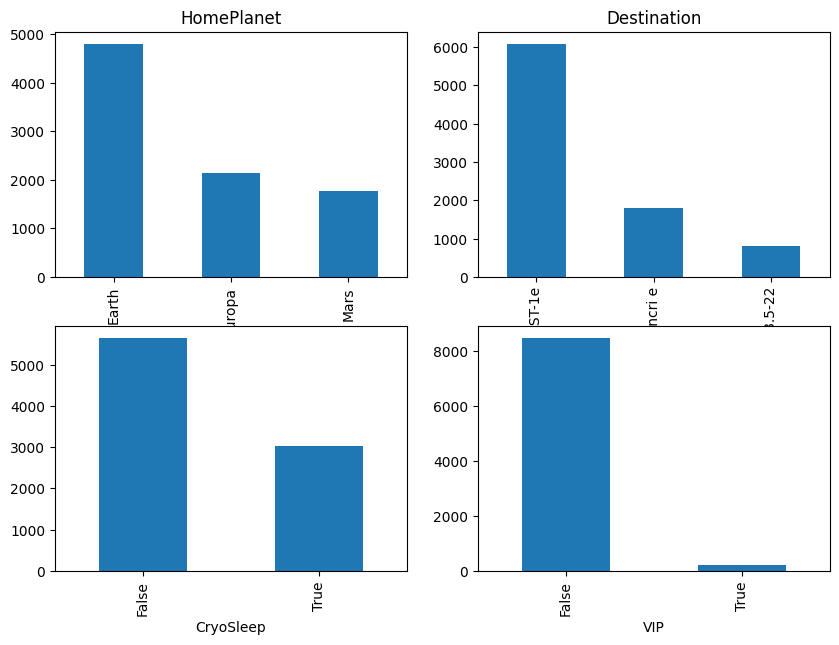

In [45]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2, 2, 2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2, 2, 3)
df['CryoSleep'].value_counts().plot(kind='bar')
plt.subplot(2, 2, 4)
df['VIP'].value_counts().plot(kind='bar')
plt.show()

## Convert categorical feature to numerical:

In [46]:
df['Cabin'].value_counts()

Cabin
G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: count, Length: 6560, dtype: int64

In [47]:
def convert(ref, fun=None):
    if fun is not None:
        df[ref] = df[ref].map(fun).astype(int)
    else:
        unique_ref = df[ref].unique()
        df[ref] = df[ref].map(dict(zip(unique_ref, list(range(len(unique_ref)))))).astype(int)





In [48]:
df[['Deck', 'Number', 'Side']] = df['Cabin'].str.split('/', expand=True)
df.drop(['Cabin'], axis=1, inplace=True)
_ = list(map(convert, ['Side', 'HomePlanet', 'Destination', 'VIP','CryoSleep']))

convert('Deck', lambda x: ord(x) - ord('A'))
df[['Deck', 'Number', 'Side', 'HomePlanet', 'Destination', 'VIP', 'CryoSleep']].head(5)

Deck Number  Side  HomePlanet  Destination  VIP  CryoSleep
0     1      0     0           0            0    0          0
1     5      0     1           1            0    0          0
2     0      0     1           0            0    1          0
3     0      0     1           0            0    0          0
4     5      1     1           1            0    0          0

## Save it to csv for modeling

In [50]:
filename = "data/processed.csv"
df.to_csv(filename, index=False)